In [63]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

sns.set(style = 'white')
telecom_churn = pd.read_csv('telecom_churn.csv')
telecom_churn = telecom_churn.drop(['customerID'], axis=1)

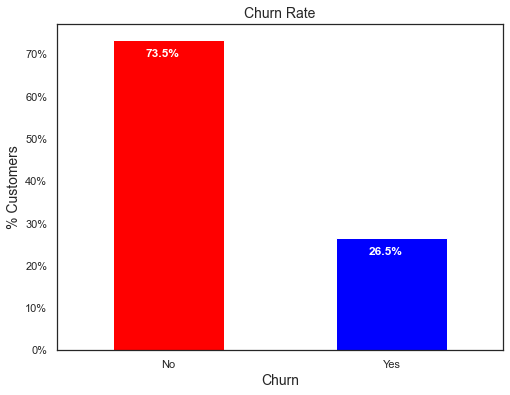

In [103]:
colors = ['red','blue']
ax = (telecom_churn['Churn'].value_counts()*100.0 /len(telecom_churn)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           )

In [64]:
#imbalanced dataset, need to oversample the minority class

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# separate the customer IDs from the rest of the data
X = telecom_churn.drop(['Churn'], axis=1)
y = telecom_churn['Churn']

# encode the categorical variables
le = LabelEncoder()
X = X.apply(le.fit_transform)

# apply oversampling
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the number of instances of each class before and after resampling
print("Number of instances per class before resampling: \n", y.value_counts())
print("Number of instances per class after resampling: \n", pd.Series(y_resampled).value_counts())

Number of instances per class before resampling: 
 No     5174
Yes    1869
Name: Churn, dtype: int64
Number of instances per class after resampling: 
 No     5174
Yes    5174
Name: Churn, dtype: int64


<AxesSubplot:>

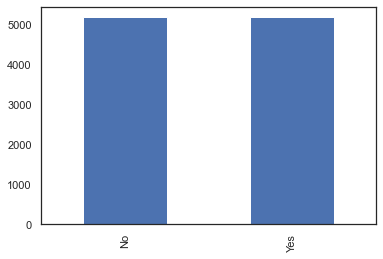

In [65]:
# Combine the resampled features and target variable into a new dataframe
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled.columns = telecom_churn.columns  # Use the original column names

# Visualize the distribution of the target variable
df_resampled['Churn'].value_counts().plot(kind='bar')

In [66]:
#look at the number of rows and columns in a Pandas dataframe
rows, columns = resampled_data.shape

print("The number of rows in the DataFrame is: ", rows)
print("The number of columns in the DataFrame is: ", columns)

The number of rows in the DataFrame is:  10348
The number of columns in the DataFrame is:  20


In [68]:
df_resampled.dropna(inplace = True)

df_resampled['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_resampled['Churn'].replace(to_replace='No',  value=0, inplace=True)

#convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df_resampled)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


<AxesSubplot:>

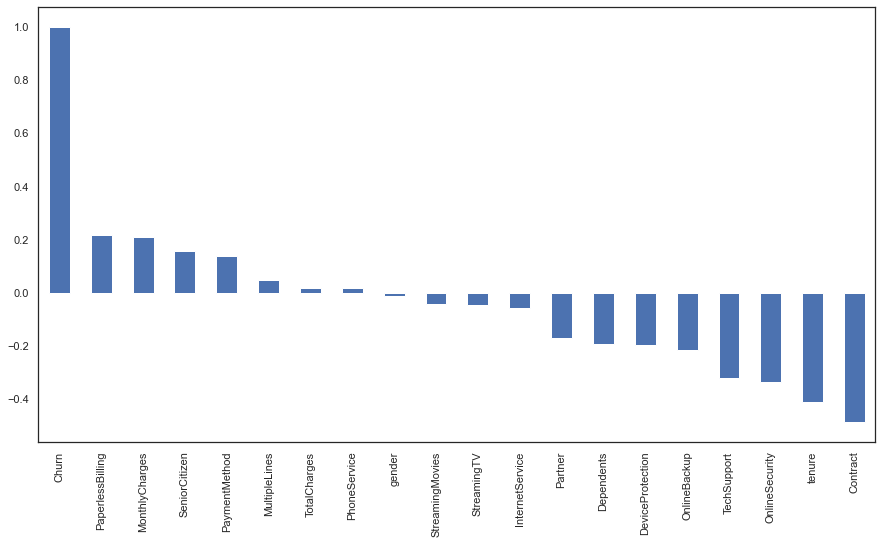

In [74]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
#Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. 
#While, tenure, two year contracts seem to be negatively correlated with churn.

#Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. 
#without internet connection seem to be negatively related to churn.

#We will explore the patterns for the above correlations below before we delve into modelling 
#and identifying the important variables.

C:\Users\wyatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

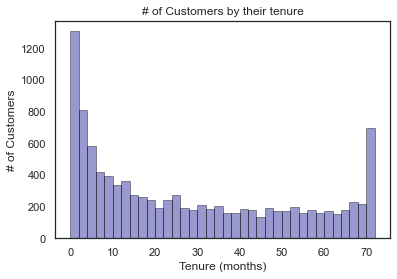

In [70]:
ax = sns.distplot(df_dummies['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

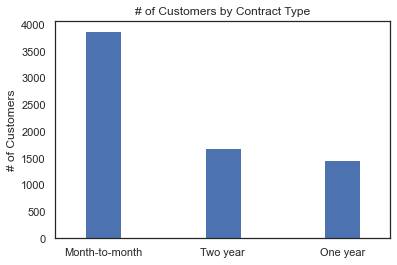

In [72]:
ax = telecom_churn['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

C:\Users\wyatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

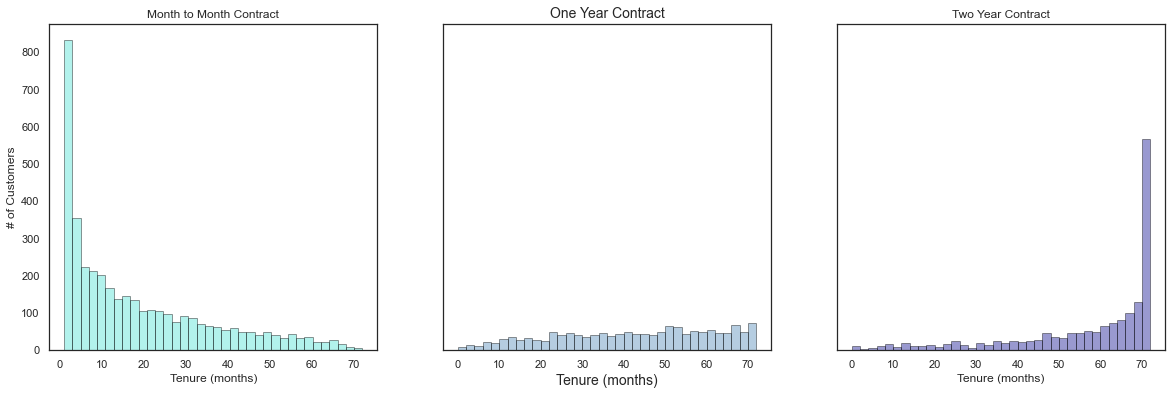

In [75]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_churn[telecom_churn['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_churn[telecom_churn['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                  hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_churn[telecom_churn['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

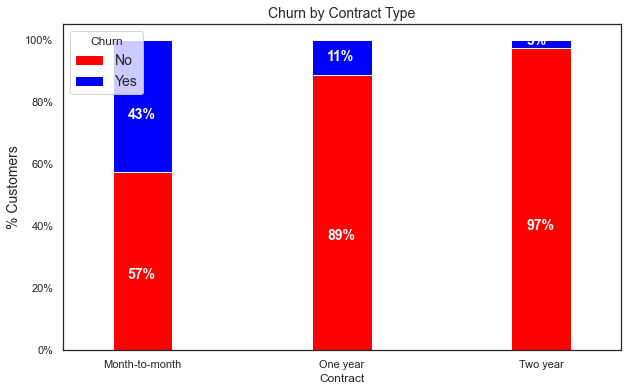

In [83]:
colors = ['red','blue']
contract_churn = telecom_churn.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [84]:
#PREDICTION

# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [104]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [107]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction metrics
print (metrics.accuracy_score(y_test, prediction_test))
print (metrics.recall_score(y_test, prediction_test))
print (metrics.precision_score(y_test, prediction_test))
print (metrics.f1_score(y_test, prediction_test))

0.7632850241545893
0.8035363457760314
0.7382671480144405
0.7695202257761053


AxesSubplot(0.125,0.125;0.775x0.755)


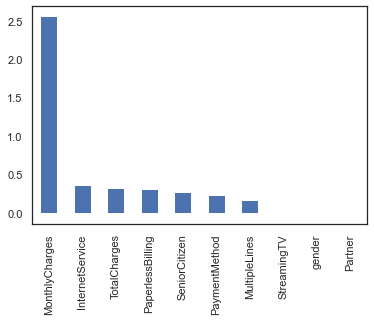

In [91]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


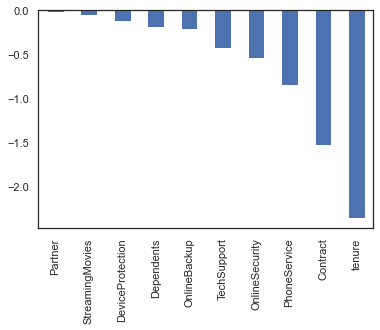

In [92]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [108]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
print (metrics.recall_score(y_test, prediction_test))
print (metrics.precision_score(y_test, prediction_test))
print (metrics.f1_score(y_test, prediction_test))

0.7782608695652173
0.8320235756385069
0.7462555066079295
0.786809103576405


<AxesSubplot:>

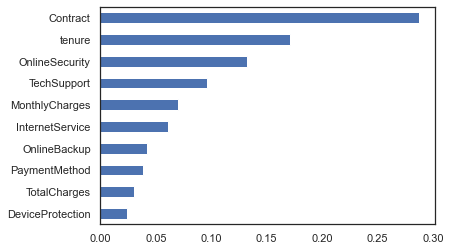

In [96]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

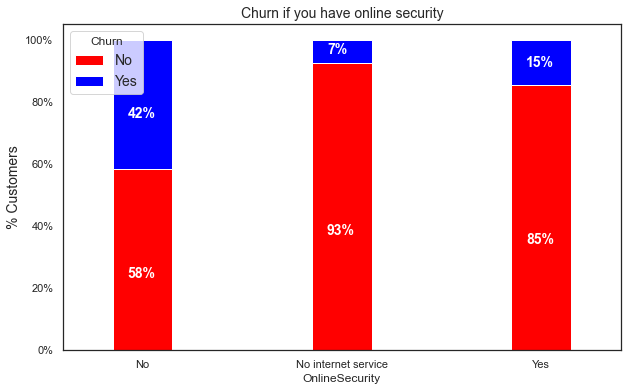

In [110]:
colors = ['red','blue']
contract_churn = telecom_churn.groupby(['OnlineSecurity','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn if you have online security',size = 14)
# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)